<a href="https://colab.research.google.com/github/MariaNguen/SBER_ML/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание №1**. Предположим, что у вас в базе есть табличка с балансом по всем счетам клиента на конец дня. Из-за особенностей построения таблицы, часть значений незаполнена и физически это означает отсутствие информации об изменении баланса. Для простоты будем считать, пропущенные значения для одного пользователя не могут встретиться между двумя заполненными. Напишите SQL запрос для заполнения неизвестных значений по каждому клиенту последним известным.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | NaN
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | NaN
3 | 18.04.2020 | NaN


In [ ]:
# <YOUR_CODE_HERE>
# если под "последним известным" имеется в виду значение, которое встретилось в последний день, то:
UPDATE t1
SET value = t2.value FROM (SELECT MAX(date), client_id, value FROM t1 WHERE value IS NOT NULL GROUP BY client_id) AS t2
WHERE t1.value IS NULL AND t2.client_id = t1.client_id
;

In [ ]:
# вариант с оконной функцией
UPDATE t1
SET value = t2.last_value FROM (SELECT client_id, value, LAST_VALUE(value) OVER (PARTITION BY client_id) AS last_value FROM t1 WHERE value IS NOT NULL) AS t2
WHERE t1.value IS NULL AND t1.client_id = t2.client_id
;

### **Задание №1.1 (*)**. В прошлом задании мы считали, что пропущенные значения не могут находиться между двумя заполненными в рамках одного пользователя, что не всегда правда в реальных задачах. Напишите теперь SQL запрос без указанного допущения.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | 7000
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | 49000
3 | 18.04.2020 | NaN

In [ ]:
# <YOUR_CODE_HERE>
# если последнее значение - это  последнее по дате, то работают предыдущие запросы

### **Задание №2**. Пусть клиенты обладают рядом статусов, закодированных цифрами: 0 - "улица", 1 - "зарплатник", 2 - "премиум", 3 - "пенсионер", 4 - "студент". У нас есть матрица с логами смен статусов за некоторый период, разверните ее в матрицу статус - статус с частотами перехода между ними.

Пример, как было:

client_id | prev_segment | new_segment|
--- | --- | ---
1 | 0 | 1
2 | 0 | 2
3 | 4 | 3

Пример, как нужно:

segment |0 | 1 | 2 | 3 | 4 
--- | --- | --- | --- | --- | ---
0 | 0 | 0.5 | 0.5 | 0 | 0 
1 | 0 |0 | 0 | 0 | 0
2 | 0 | 0 | 0 | 0 | 0
3 | 0 | 0 | 0 | 0 | 0
4 | 0 | 0 | 0 | 1 | 0

В процессе выполнения задания разрешается пользоваться библиотеками numpy и pandas.

In [1]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=5, size=(50000000, 2)),
    columns=['prev_segment', 'new_segment']
)

# <YOUR_CODE_HERE>
segments = pd.unique(data['prev_segment'])
x = np.zeros((len(segments), len(segments)))
for i in segments:
    for j in segments:
        x[i][j] = data[(data['prev_segment'] == i) & (data['new_segment'] == j)].shape[0] / data[data['prev_segment'] == i].shape[0]
m = pd.DataFrame(data = x)
m

,0,1,2,3,4
0,0.199998,0.199997,0.200143,0.199779,0.200083
1,0.199869,0.200200,0.199940,0.199973,0.200018
2,0.200058,0.199892,0.200086,0.199982,0.199982
3,0.200032,0.199810,0.200008,0.199969,0.200181
4,0.199977,0.200244,0.199905,0.199943,0.199930


### **Задание №2.1 (*)**. Если вы не пользовались библиотечными функциями и реализовывали алгоритм самостоятельно, напишите, пожалуйста, его асимптотическую сложность в терминах O-большое.

In [ ]:
# <YOUR_CODE_HERE>

### **Задание №3**. Постройте прогнозую модель для датасета с UCI Machine Learning: предобработайте категориальные фичи, отберите их, соберите схему валидации и отберите модели с помощью нее. Описание датасета по ссылке: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Данная задача multilabel multiclass classification, поэтому предлагаю начать с одного из подходов:
- Свести задачу к multilabel binary classification, как это указано в описании к датасету;
- Свести задачку к binary classification тем или иным способом;
- Обучить множество multiclass/binary classification моделей;
- Что-то еще, что придет в голову.


In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data

--2023-02-18 08:32:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346695 (339K) [application/x-httpd-php]
Saving to: ‘drug_consumption.data’

drug_consumption.da 100%[===================>] 338.57K  --.-KB/s    in 0.04s   

2023-02-18 08:32:44 (7.53 MB/s) - ‘drug_consumption.data’ saved [346695/346695]



In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv('drug_consumption.data', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
#Переименуем столбцы, потому что не очень понятно, что это за фичи
columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 
            'Conscientiousness', 'Impulsiveness', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data.columns=columns
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
#проверим данные на наличие пропусков
data.isnull().sum()

Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
SS                   0
Alcohol              0
Amphet               0
Amyl                 0
Benzos               0
Caff                 0
Cannabis             0
Choc                 0
Coke                 0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
LegalH               0
LSD                  0
Meth                 0
Mushrooms            0
Nicotine             0
Semer                0
VSA                  0
dtype: int64

In [8]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
      'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Meth', 
      'Mushrooms', 'Nicotine', 'Semer', 'VSA']
drugs_df = data[drugs]
drugs_df.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

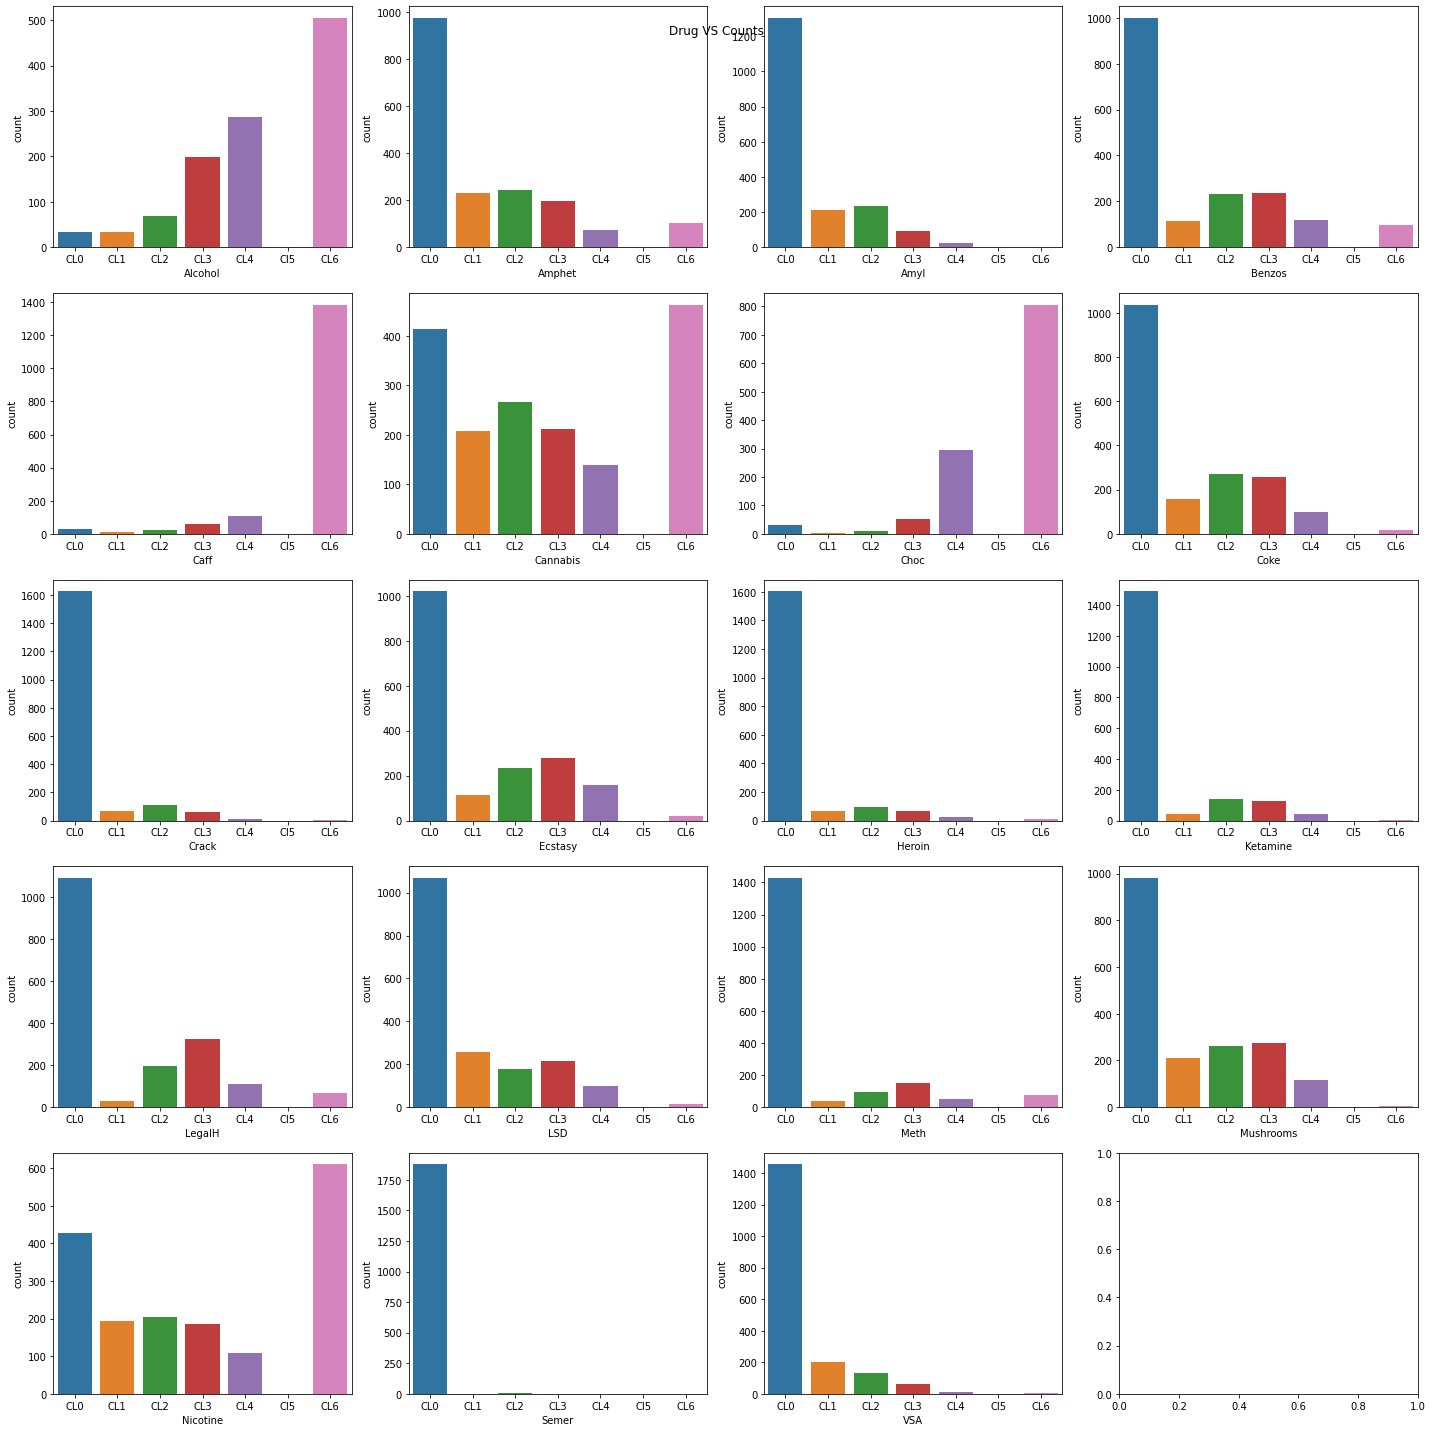

In [11]:
# Посмотрим, как распределяется по классам употребление того или иного вещества
fig, ax = plt.subplots(5,4,figsize = (20,20))
fig.suptitle("Drug VS Counts")
axe = ax.ravel()
for i, drug in enumerate(drugs):
  sns.countplot(x=drug, data=drugs_df,order = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'Cl5', 'CL6'], ax=axe[i])
plt.subplots_adjust(bottom=0, right=0.8, top=1)
plt.tight_layout(pad=1.08)
plt.show()

In [12]:
# В зависимости от того, какую задачу мы хотим решать, категориальные фичи можно пробразовать по-разному
# Я предлагаю преобразовать решать задачу бинарной классификации, предложенную в описании датасета
# For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User"
# Заменим строки на 0 и 1 (Non-User и User)
 
data = data.replace({'CL0': 0, 'CL1':0, 'CL2':1, 'CL3':1, 'CL4':1, 'CL5':1, 'CL6':1})
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0


In [13]:
data[drugs].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.963926,0.360212,0.196286,0.407958,0.980371,0.671088,0.981432,0.364456,0.101326,0.398408,0.112467,0.185676,0.404244,0.295491,0.221220,0.368170,0.670557,0.003183,0.122016
std,0.186524,0.480189,0.397293,0.491586,0.138757,0.469943,0.135028,0.481405,0.301840,0.489700,0.316024,0.388948,0.490875,0.456384,0.415179,0.482436,0.470136,0.056343,0.327391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data[drugs].sum()

Alcohol      1817
Amphet        679
Amyl          370
Benzos        769
Caff         1848
Cannabis     1265
Choc         1850
Coke          687
Crack         191
Ecstasy       751
Heroin        212
Ketamine      350
LegalH        762
LSD           557
Meth          417
Mushrooms     694
Nicotine     1264
Semer           6
VSA           230
dtype: int64

Ожидаемо, алкоголь, шоколад и кофеин - это самые употребляемые вещества, почти каждый респондент их употреблял в течение последних 10 лет.
Шесть человек сказали, что употребляли вымышленный наркотик Semeron. 

In [133]:
data[data['Semer'] == 1][drugs]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,
730,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
821,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,1,1,0
1520,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0
1537,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1
1702,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0
1827,1,0,0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,0


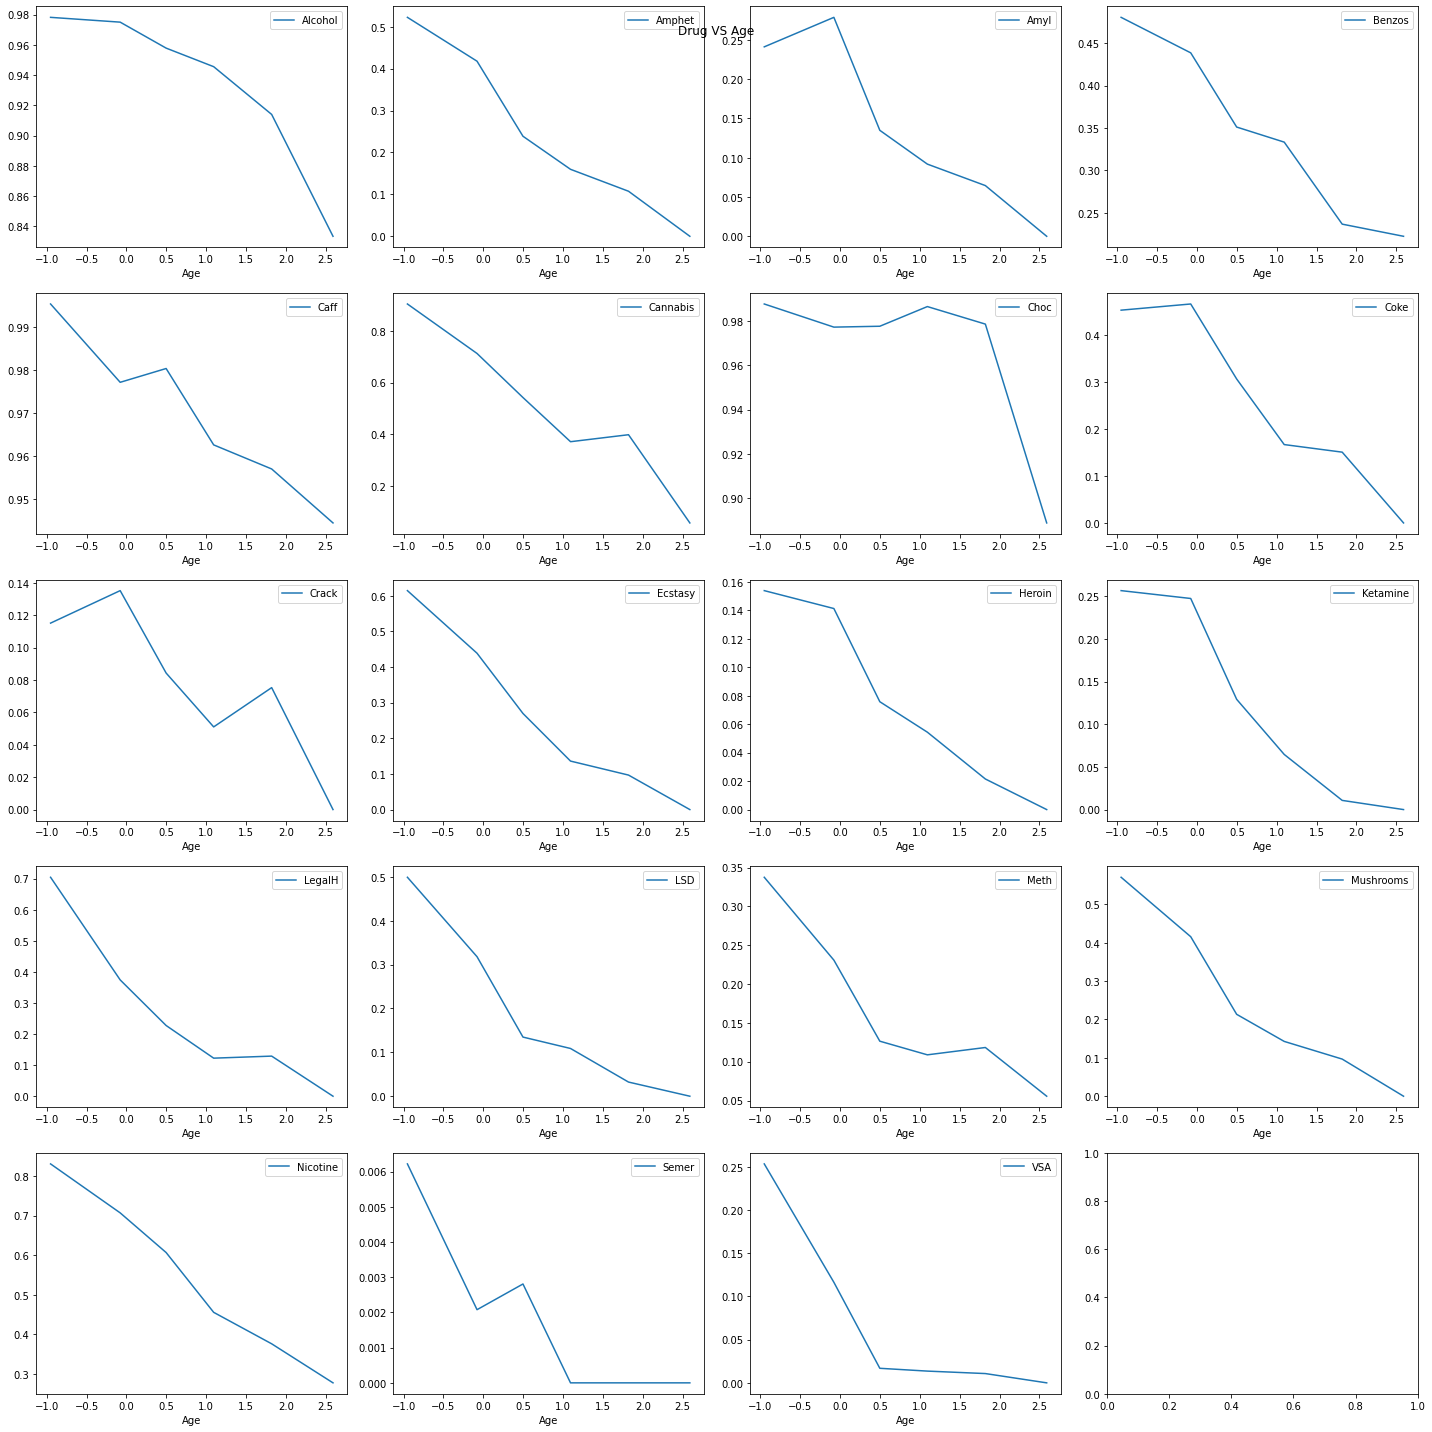

In [15]:
# Посмотрим, как меняется употребление наркотических веществ с возрастом
fig, ax = plt.subplots(5,4,figsize = (20,20))
fig.suptitle("Drug VS Age")
axe = ax.ravel()
for i, drug in enumerate(drugs):
  data[[drug,'Age']].groupby(['Age']).mean().plot(ax=axe[i])
plt.subplots_adjust(bottom=0, right=0.8, top=1)
plt.tight_layout(pad=1.08)
plt.show()


К старости люди перестают употреблять, но шоколад едят  :)

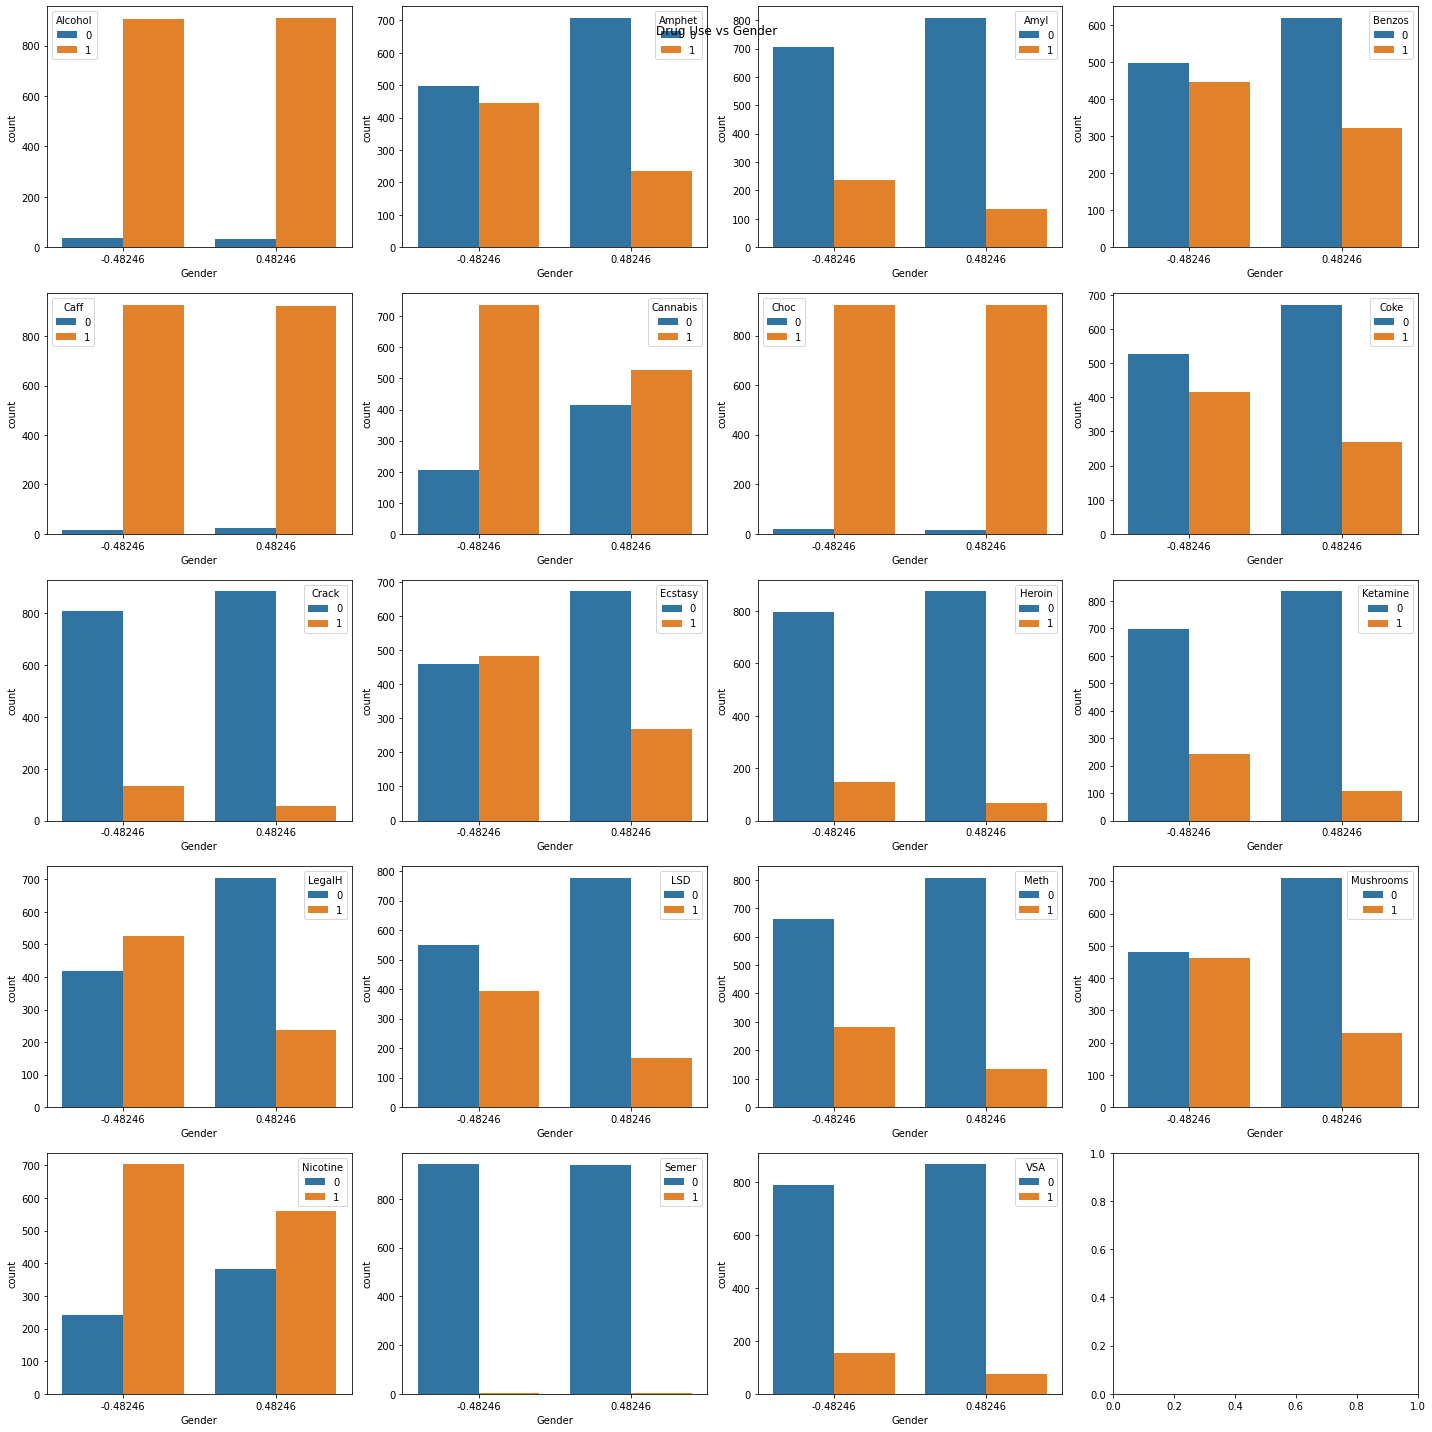

In [16]:
# Посмотрим, что с полом
# 0.48246 Female 942 49.97%
# -0.48246 Male 943 50.03%
fig, ax = plt.subplots(5,4,figsize = (20,20))
fig.suptitle("Drug Use vs Gender")
axe = ax.ravel()
for i, drug in enumerate(drugs):
  sns.countplot(x='Gender',hue=drug,data=data,ax=axe[i])
  
plt.subplots_adjust(bottom=0, right=0.8, top=1)
plt.tight_layout(pad=1.08)
plt.show()


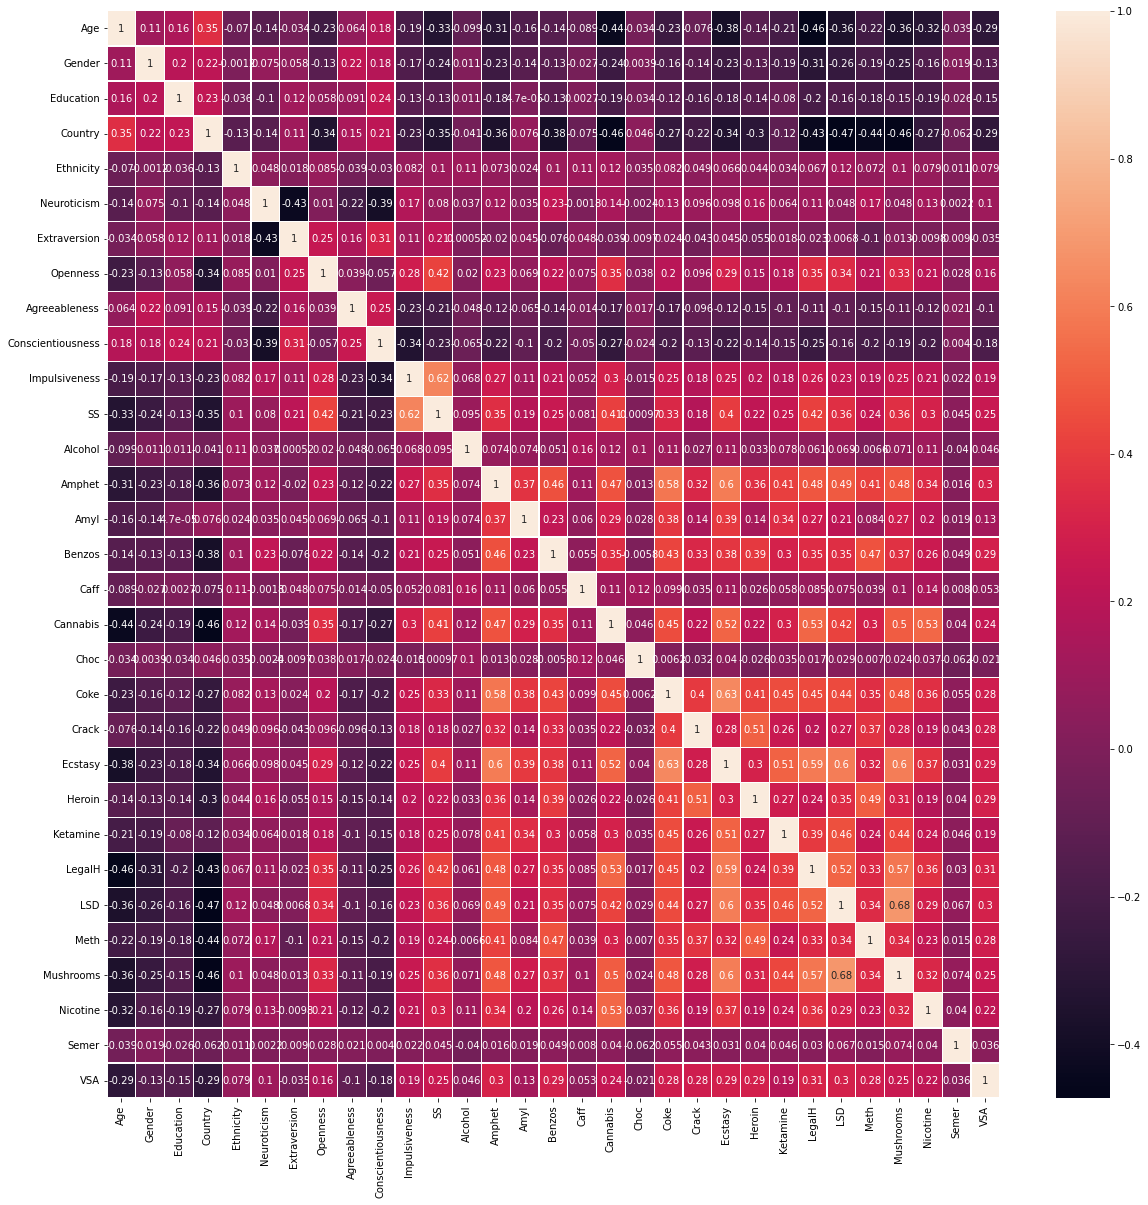

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.2)
plt.show()

Интересно, что употребление одних наркотических веществ коррелирует с употреблением других, напр., LSD и экстази, LSD и грибы, кокаин и экстази. 

Сначала сведем задачу к задаче бинарной классификации User/Non-User.
Если респондент употреблял какие-то наркотические вещества в последние 10 лет, то считаем, что он User.
Предлагаю исключить из рассмотрения алкоголь, шоколад и кофеин, т.к. почти все респонденты их употребляли.
Их отнесем к фичам.

In [18]:
data_user = data
data_user['User'] = int(0)
illegal_drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 
                 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
for i in data_user.index:
    for drug in illegal_drugs:
        if data_user[drug][i] == 1:
            data_user['User'][i] = 1
data_user = data_user.drop(illegal_drugs, axis=1)
data_user.head()

<ipython-input-18-c89f1e4fedea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user['User'][i] = 1


,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,SS,Alcohol,Caff,Choc,User
0,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,1,1
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,1,1
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,1,1
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,1


In [19]:
data_user['User'].value_counts()

1    1553
0     332
Name: User, dtype: int64

Распределение значений скошено в сторону употребления веществ, судя по всему из-за никтоина и марихуаны.

# Обучим модели

In [20]:
from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.linear_model import RidgeClassifier # гребневая классификация с l2 регуляризацией
from sklearn.neighbors import KNeighborsClassifier # метод ближайших соседей
from sklearn.model_selection import train_test_split # обучение и тест
from sklearn import metrics # метрика accuracy
from sklearn.metrics import confusion_matrix # матрица ошибок
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn.naive_bayes import GaussianNB # наивный Байес
from sklearn.model_selection import GridSearchCV 

In [21]:
X = data_user[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 
               'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'SS', 'Alcohol', 'Caff', 'Choc']]
y = data_user['User']
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,shuffle=True,random_state=0)

## Определим функции, которые будут писать информацию о качестве каждой модели

In [22]:
def performance_result(model, X_test, y_test):
  prediction=model.predict(X_test)
  print('Model accuracy is', metrics.accuracy_score(prediction, y_test))
  print('Model F-score', metrics.f1_score(prediction,y_test))
  print('Model Precision', metrics.precision_score(prediction,y_test))
  print('Model Recall', metrics.recall_score(prediction,y_test))
  print("Classification Report:")
  print(metrics.classification_report(y_test, prediction))
  sns.heatmap(confusion_matrix(y_test, prediction),annot=True,cmap='viridis',fmt='g')
  plt.xlabel("Предсказанное значение")
  plt.ylabel("Фактическое значение")
  

In [23]:
def roc_auc_curve(model, X_test, y_test):
  prediction=model.predict(X_test)
  roc_auc_score = metrics.roc_auc_score(y_test, prediction)
  print('Model ROC AUC=%.3f' % (roc_auc_score))
  # рассчитываем roc-кривую
  fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
  roc_auc = metrics.auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

## Логистическая регрессия

Model accuracy is 0.8321554770318021
Model F-score 0.9011446409989594
Model Precision 0.9454148471615721
Model Recall 0.8608349900596421
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.35      0.44       108
           1       0.86      0.95      0.90       458

    accuracy                           0.83       566
   macro avg       0.73      0.65      0.67       566
weighted avg       0.81      0.83      0.81       566

Model ROC AUC=0.649


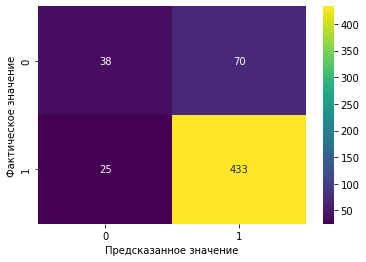

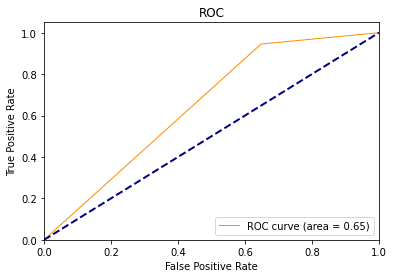

In [30]:
modelLR = LogisticRegression(random_state=1)
modelLR.fit(X_train,np.ravel(y_train))
performance_result(modelLR, X_test, y_test)
roc_auc_curve(modelLR, X_test, y_test)

## Гребневая регрессия

Model accuracy is 0.8162544169611308
Model F-score 0.8976377952755906
Model Precision 0.9956331877729258
Model Recall 0.8172043010752689
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.06      0.10       108
           1       0.82      1.00      0.90       458

    accuracy                           0.82       566
   macro avg       0.78      0.53      0.50       566
weighted avg       0.80      0.82      0.75       566

Model ROC AUC=0.526


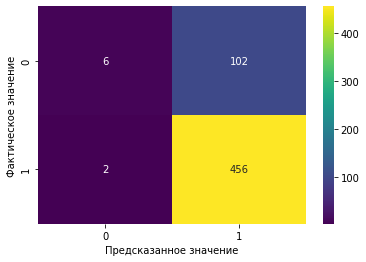

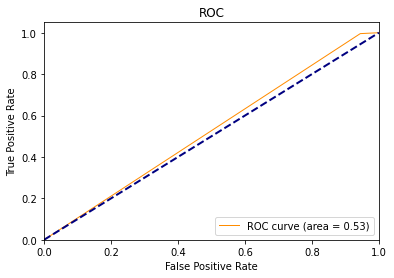

In [31]:
modelRC = RidgeClassifier(random_state=1)
modelRC.fit(X_train,np.ravel(y_train))
performance_result(modelRC, X_test, y_test)
roc_auc_curve(modelRC, X_test, y_test)

Цифры ACCURACY дают ложное представление о том, что все не так уж и плохо, но модель просто обучилась почти везде говорить 1. Цифры макро-усредненных P, R и F_Score, а также ROC_AUC это хорошо демонстрируют.

## Метод К-ближайших соседей

Model accuracy is 0.8197879858657244
Model F-score 0.8921775898520085
Model Precision 0.9213973799126638
Model Recall 0.8647540983606558
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.39      0.45       108
           1       0.86      0.92      0.89       458

    accuracy                           0.82       566
   macro avg       0.70      0.66      0.67       566
weighted avg       0.80      0.82      0.81       566

Model ROC AUC=0.655


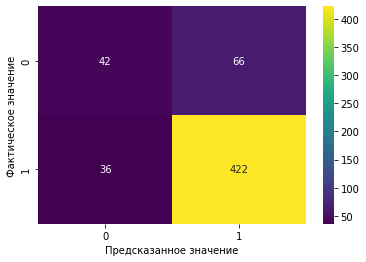

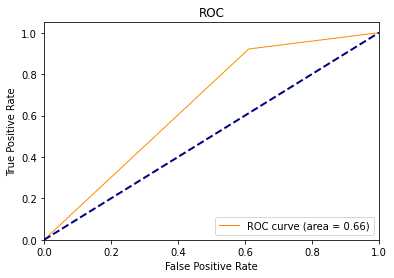

In [122]:
param_grid_KNN = {"n_neighbors": list(range(1,11)) }
modelKNN = KNeighborsClassifier()
GS_KNN = GridSearchCV(modelKNN, param_grid_KNN, cv=5)
GS_KNN.fit(X_train,y_train)
modelKNN = GS_KNN.best_estimator_
modelKNN.fit(X_train,np.ravel(y_train))
performance_result(modelKNN, X_test, y_test)
roc_auc_curve(modelKNN, X_test, y_test)

## Случайный лес

Model accuracy is 0.8144876325088339
Model F-score 0.8893572181243413
Model Precision 0.9213973799126638
Model Recall 0.8594704684317719
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.36      0.43       108
           1       0.86      0.92      0.89       458

    accuracy                           0.81       566
   macro avg       0.69      0.64      0.66       566
weighted avg       0.79      0.81      0.80       566

Model ROC AUC=0.641


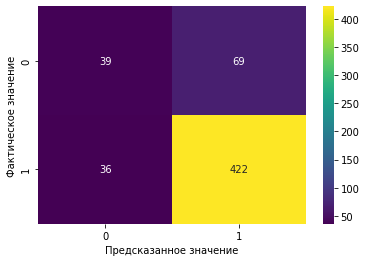

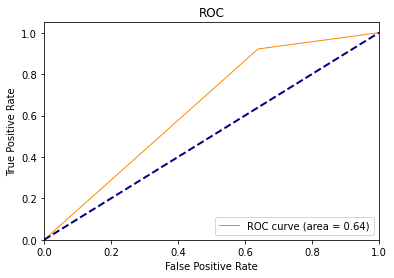

In [120]:
modelRFC = RandomForestClassifier(random_state=1)
param_grid_RFC = {"max_depth": [3, 4, 5, None], 
                   "max_features": ['sqrt', 'log2'],
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"],
                   "n_estimators": [20,40,60,80,100] }
GS_RFC = GridSearchCV(modelRFC, param_grid_RFC, cv=5)
GS_RFC.fit(X_train,np.ravel(y_train))
modelRFC = GS_RFC.best_estimator_
modelRFC.fit(X_train,np.ravel(y_train))
performance_result(modelRFC, X_test, y_test)
roc_auc_curve(modelRFC, X_test, y_test)

## Наивный Байес

Model accuracy is 0.8197879858657244
Model F-score 0.886917960088692
Model Precision 0.8733624454148472
Model Recall 0.9009009009009009
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      0.56       108
           1       0.90      0.87      0.89       458

    accuracy                           0.82       566
   macro avg       0.71      0.73      0.72       566
weighted avg       0.83      0.82      0.82       566

Model ROC AUC=0.733


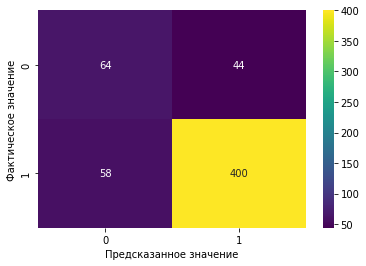

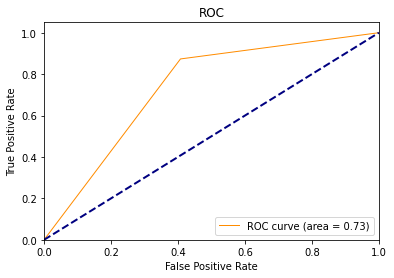

In [124]:
modelNB = GaussianNB()
modelNB.fit(X_train,np.ravel(y_train))
performance_result(modelNB, X_test, y_test)
roc_auc_curve(modelNB, X_test, y_test)

Топ-3 моделей по Accuracy:
1. Логистическая регрессия (0.8321554770318021)
2. K-Nearest Neighbors (0.8197879858657244) и наивный Байес (0.8197879858657244
3. Случайный лес (0.8144876325088339)

Топ-3 моделей по F-мере:
1. Логистическая регрессия (0.9011446409989594)
2. K-Nearest Neighbors (0.8921775898520085)
3. Случайный лес (0.8893572181243413)

Топ-3 моделей по ROC-AUC:
1. Наивный Байес (0.733)
2. K-Nearest Neighbors (0.655)
3. Логистическая регрессия (0.649)

Выводы: конечно, можно выбрать одну из моделей по той или иной метрике (из обученных моделей логистическая регрессия справилась лучше всего по двум показателям и вошла в топ-3 по третьему показателю), но все модели объединяет тот факт, что они плохо предсказывают класс Non-User (см. макро-усредненные метрики). В данных преобладает класс User, поэтому это было ожидаемо.



Предлагаю немного сменить постановку задачи и протестировать четыре модели, которые показали лучшие результаты на смещенном в сторону одного класса датасете.
Что поменяем:
1. Людей, которые употребляли только никотин в последние 10 лет не будем считать User-ами, никотин уйдет в фичи.
2. Категориальные фичи алкоголь, шоколад, никотин и кофеин преобразуем другим образом. 

In [35]:
# новый датасет
pd.get_dummies(drugs_df[['Alcohol', 'Caff', 'Nicotine', 'Choc']])

,Alcohol_CL0,Alcohol_CL1,Alcohol_CL2,Alcohol_CL3,Alcohol_CL4,Alcohol_CL5,Alcohol_CL6,Caff_CL0,Caff_CL1,Caff_CL2,...,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6,Choc_CL0,Choc_CL1,Choc_CL2,Choc_CL3,Choc_CL4,Choc_CL5,Choc_CL6
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1885,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1886,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [36]:
data_user_2 = data.drop(['Alcohol', 'Caff', 'Nicotine', 'Choc'], axis=1)
data_user_2 = pd.concat([data_user_2, pd.get_dummies(drugs_df[['Alcohol', 'Caff', 'Nicotine', 'Choc']])], axis=1)
data_user_2['User'] = int(0)

In [37]:
data_user_2.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6,Choc_CL0,Choc_CL1,Choc_CL2,Choc_CL3,Choc_CL4,Choc_CL5,Choc_CL6
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,1,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,0,0,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,1


In [38]:
illegal_drugs_2 = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 
                 'Meth', 'Mushrooms', 'Semer', 'VSA']
for i in data_user_2.index:
    for drug in illegal_drugs_2:
        if data_user_2[drug][i] == 1:
            data_user_2['User'][i] = 1
data_user_2 = data_user_2.drop(illegal_drugs_2, axis=1)
data_user_2.head()

<ipython-input-38-5989d260d666>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user_2['User'][i] = 1


,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Nicotine_CL4,Nicotine_CL5,Nicotine_CL6,Choc_CL0,Choc_CL1,Choc_CL2,Choc_CL3,Choc_CL4,Choc_CL5,Choc_CL6
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,1,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,0,0,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,1


In [39]:
data_user_2.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'SS', 'User', 'Alcohol_CL0', 'Alcohol_CL1',
       'Alcohol_CL2', 'Alcohol_CL3', 'Alcohol_CL4', 'Alcohol_CL5',
       'Alcohol_CL6', 'Caff_CL0', 'Caff_CL1', 'Caff_CL2', 'Caff_CL3',
       'Caff_CL4', 'Caff_CL5', 'Caff_CL6', 'Nicotine_CL0', 'Nicotine_CL1',
       'Nicotine_CL2', 'Nicotine_CL3', 'Nicotine_CL4', 'Nicotine_CL5',
       'Nicotine_CL6', 'Choc_CL0', 'Choc_CL1', 'Choc_CL2', 'Choc_CL3',
       'Choc_CL4', 'Choc_CL5', 'Choc_CL6'],
      dtype='object')

In [40]:
X_2 = data_user_2[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsiveness', 'SS', 'Alcohol_CL0', 'Alcohol_CL1',
       'Alcohol_CL2', 'Alcohol_CL3', 'Alcohol_CL4', 'Alcohol_CL5',
       'Alcohol_CL6', 'Caff_CL0', 'Caff_CL1', 'Caff_CL2', 'Caff_CL3',
       'Caff_CL4', 'Caff_CL5', 'Caff_CL6', 'Nicotine_CL0', 'Nicotine_CL1',
       'Nicotine_CL2', 'Nicotine_CL3', 'Nicotine_CL4', 'Nicotine_CL5',
       'Nicotine_CL6', 'Choc_CL0', 'Choc_CL1', 'Choc_CL2', 'Choc_CL3',
       'Choc_CL4', 'Choc_CL5', 'Choc_CL6']]
y_2 = data_user_2['User']

In [41]:
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2, y_2,test_size=0.3,shuffle=True,random_state=0)

Model accuracy is 0.8392226148409894
Model F-score 0.8938156359393231
Model Precision 0.916267942583732
Model Recall 0.8724373576309795
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       148
           1       0.87      0.92      0.89       418

    accuracy                           0.84       566
   macro avg       0.80      0.77      0.78       566
weighted avg       0.83      0.84      0.84       566

Model ROC AUC=0.769


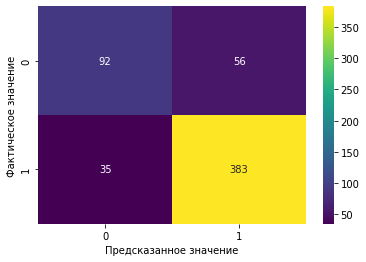

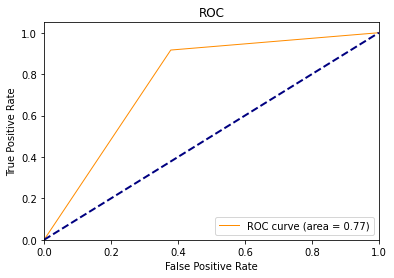

In [42]:
#логистическая регрессия
modelLR2 = LogisticRegression(random_state=1)
modelLR2.fit(X_2_train,np.ravel(y_2_train))
performance_result(modelLR2, X_2_test, y_2_test)
roc_auc_curve(modelLR2, X_2_test, y_2_test)

Model accuracy is 0.8268551236749117
Model F-score 0.8865740740740741
Model Precision 0.916267942583732
Model Recall 0.8587443946188341
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       148
           1       0.86      0.92      0.89       418

    accuracy                           0.83       566
   macro avg       0.78      0.75      0.76       566
weighted avg       0.82      0.83      0.82       566

Model ROC AUC=0.745


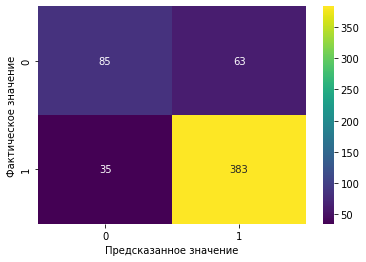

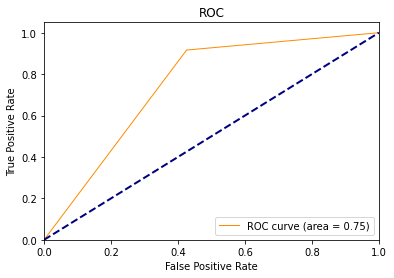

In [125]:
#случайный лес
modelRFC2 = RandomForestClassifier(random_state=1)
param_grid_RFC2 = {"max_depth": [3, 4, 5, None], 
                   "max_features": ['sqrt', 'log2'],
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"],
                   "n_estimators": [20,40,60,80,100] }
GS_RFC2 = GridSearchCV(modelRFC2, param_grid_RFC2, cv=5)
GS_RFC2.fit(X_2_train,np.ravel(y_2_train))
modelRFC2 = GS_RFC2.best_estimator_
modelRFC2.fit(X_2_train,np.ravel(y_2_train))
performance_result(modelRFC2, X_2_test, y_2_test)
roc_auc_curve(modelRFC2, X_2_test, y_2_test)

Model accuracy is 0.8197879858657244
Model F-score 0.8759124087591241
Model Precision 0.861244019138756
Model Recall 0.8910891089108911
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       148
           1       0.89      0.86      0.88       418

    accuracy                           0.82       566
   macro avg       0.77      0.78      0.77       566
weighted avg       0.83      0.82      0.82       566

Model ROC AUC=0.782


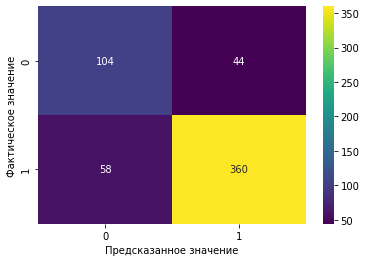

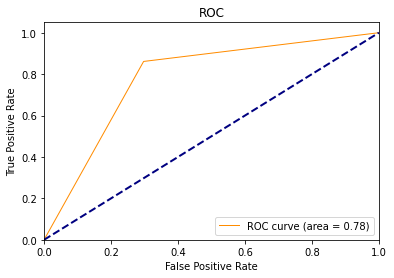

In [45]:
# метод K-ближайших соседей
param_grid_KNN2 = {"n_neighbors": list(range(1,11)) }
modelKNN2 = KNeighborsClassifier()
GS_KNN2 = GridSearchCV(modelKNN2, param_grid_KNN2, cv=5)
GS_KNN2.fit(X_2_train,y_2_train)
modelKNN2 = GS_KNN2.best_estimator_
modelKNN2.fit(X_2_train,np.ravel(y_2_train))
performance_result(modelKNN2, X_2_test, y_2_test)
roc_auc_curve(modelKNN2, X_2_test, y_2_test)

Model accuracy is 0.6925795053003534
Model F-score 0.7542372881355931
Model Precision 0.638755980861244
Model Recall 0.9206896551724137
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.84      0.59       148
           1       0.92      0.64      0.75       418

    accuracy                           0.69       566
   macro avg       0.69      0.74      0.67       566
weighted avg       0.80      0.69      0.71       566

Model ROC AUC=0.742


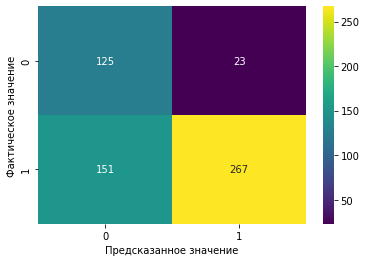

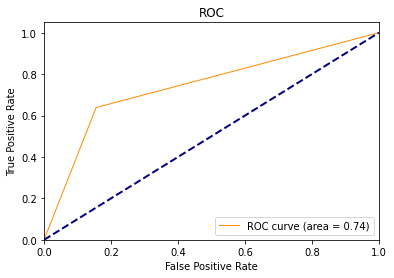

In [46]:
# Наивный Байес
modelNB2 = GaussianNB()
modelNB2.fit(X_2_train,y_2_train)
performance_result(modelNB2, X_2_test, y_2_test)
roc_auc_curve(modelNB2, X_2_test, y_2_test)

Accuracy моделей по убыванию:
1. Логистическая регрессия (0.8392226148409894)
2. Случайный лес (0.8268551236749117)
3. Метод K ближайших соседей (0.8197879858657244)
4. Наивный Байес (0.6925795053003534)

F-мера моделей по убыванию:
1. Логистическая регрессия (0.8938156359393231)
2. Случайный лес (0.8865740740740741)
3. Метод K ближайших соседей (0.8759124087591241)
4. Наивный Байес (0.7542372881355931)

ROC-AUC моделей по убыванию:
1. Метод K ближайших соседей (0.782)
2. Логистическая регрессия (0.769)
3. Случайный лес (0.745)
4. Наивный Байес (0.742)

После изменения предсказываемого класса выросла метрика ROC-AUC. Accuracy осталась неизменной, а F-мера упала. 

Теперь предлагаю еще раз сменить постановку задачи и обучить модели определять User-ов одного вещества, например, марихуаны.

# Предсказываем User-ов конкретного вещества

In [47]:
X_c = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 
            'Conscientiousness', 'Impulsiveness', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']]
y_c = data['Cannabis']

In [48]:
X_c_train,X_c_test,y_c_train,y_c_test = train_test_split(X_c, y_c,test_size=0.3,shuffle=True,random_state=0)

## Логистическая регрессия

Model accuracy is 0.8745583038869258
Model F-score 0.9023383768913342
Model Precision 0.8913043478260869
Model Recall 0.9136490250696379
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       198
           1       0.91      0.89      0.90       368

    accuracy                           0.87       566
   macro avg       0.86      0.87      0.86       566
weighted avg       0.88      0.87      0.88       566

Model ROC AUC=0.867


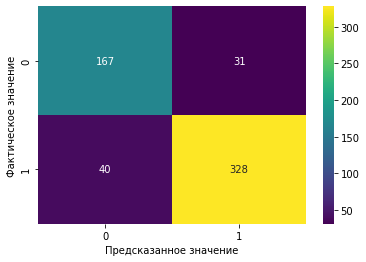

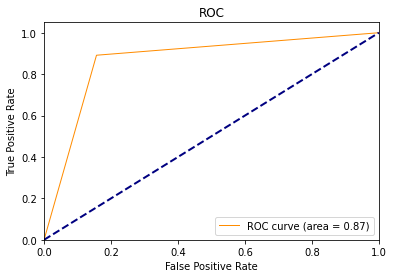

In [49]:
modelLRC = LogisticRegression(random_state=1)
modelLRC.fit(X_c_train,np.ravel(y_c_train))
performance_result(modelLRC, X_c_test, y_c_test)
roc_auc_curve(modelLRC, X_c_test, y_c_test)

## Гребневая регрессия

Model accuracy is 0.8798586572438163
Model F-score 0.90633608815427
Model Precision 0.8940217391304348
Model Recall 0.9189944134078212
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       198
           1       0.92      0.89      0.91       368

    accuracy                           0.88       566
   macro avg       0.87      0.87      0.87       566
weighted avg       0.88      0.88      0.88       566

Model ROC AUC=0.874


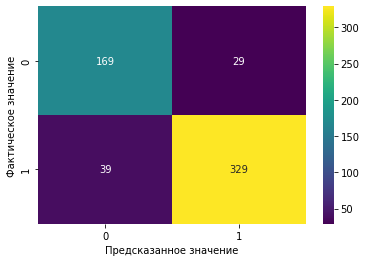

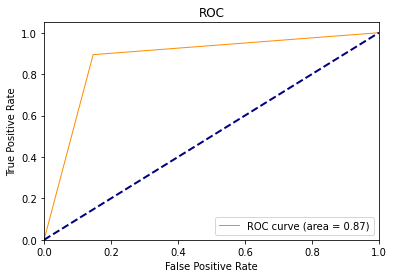

In [50]:
modelRCC = RidgeClassifier(random_state=1)
modelRCC.fit(X_c_train,np.ravel(y_c_train))
performance_result(modelRCC, X_c_test, y_c_test)
roc_auc_curve(modelRCC, X_c_test, y_c_test)

## Метод К-ближайших соседей

Model accuracy is 0.8445229681978799
Model F-score 0.8717201166180759
Model Precision 0.8125
Model Recall 0.940251572327044
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       198
           1       0.94      0.81      0.87       368

    accuracy                           0.84       566
   macro avg       0.83      0.86      0.84       566
weighted avg       0.86      0.84      0.85       566

Model ROC AUC=0.858


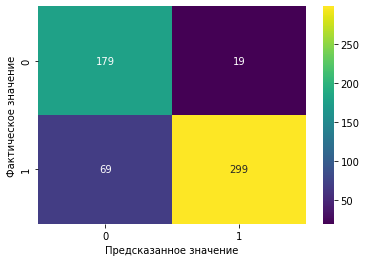

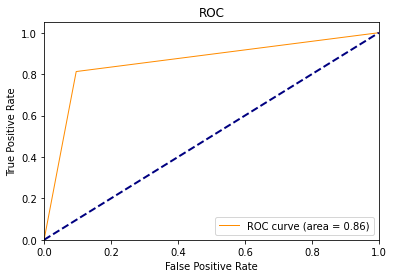

In [51]:
param_grid_KNNC = {"n_neighbors": list(range(1,11)) }
modelKNNC = KNeighborsClassifier()
GS_KNNC = GridSearchCV(modelKNNC, param_grid_KNNC, cv=5)
GS_KNNC.fit(X_c_train,y_c_train)
modelKNNC = GS_KNNC.best_estimator_
modelKNNC.fit(X_c_train,np.ravel(y_c_train))
performance_result(modelKNNC, X_c_test, y_c_test)
roc_auc_curve(modelKNNC, X_c_test, y_c_test)

## Случайный лес

Model accuracy is 0.8692579505300353
Model F-score 0.896358543417367
Model Precision 0.8695652173913043
Model Recall 0.9248554913294798
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       198
           1       0.92      0.87      0.90       368

    accuracy                           0.87       566
   macro avg       0.85      0.87      0.86       566
weighted avg       0.87      0.87      0.87       566

Model ROC AUC=0.869


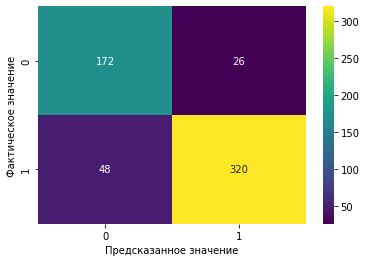

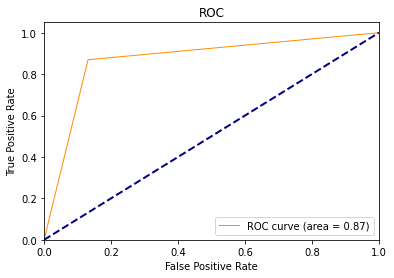

In [126]:
modelRFCC = RandomForestClassifier(random_state=1)
param_grid_RFCC = {"max_depth": [3, 4, 5, None], 
                   "max_features": ['sqrt', 'log2'],
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"],
                   "n_estimators": [20,40,60,80,100] }
GS_RFCC = GridSearchCV(modelRFCC, param_grid_RFCC, cv=5)
GS_RFCC.fit(X_c_train,np.ravel(y_c_train))
modelRFCC = GS_RFCC.best_estimator_
modelRFCC.fit(X_c_train,np.ravel(y_c_train))
performance_result(modelRFCC, X_c_test, y_c_test)
roc_auc_curve(modelRFCC, X_c_test, y_c_test)

In [127]:
GS_RFCC.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

## Наивный Байес

Model accuracy is 0.8197879858657244
Model F-score 0.8449848024316109
Model Precision 0.7554347826086957
Model Recall 0.9586206896551724
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       198
           1       0.96      0.76      0.84       368

    accuracy                           0.82       566
   macro avg       0.82      0.85      0.81       566
weighted avg       0.86      0.82      0.82       566

Model ROC AUC=0.847


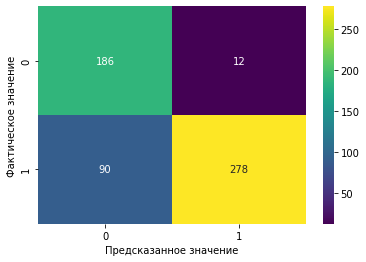

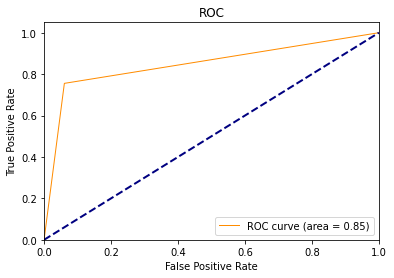

In [54]:
modelNBC = GaussianNB()
modelNBC.fit(X_c_train,np.ravel(y_c_train))
performance_result(modelNBC, X_c_test, y_c_test)
roc_auc_curve(modelNBC, X_c_test, y_c_test)

Топ-3 моделей по Accuracy:
1. Гребневая регрессия (0.8798586572438163)
2. Логистическая регрессия (0.8745583038869258)
3. Случайный лес (0.8692579505300353)

Топ-3 моделей по F-мере:
1. Гребневая регрессия (0.90633608815427)
2. Логистическая регрессия (0.9023383768913342)
3. Случайный лес (0.896358543417367)

Топ-3 моделей по ROC-AUC:
1. Гребневая регрессия (0.874)
2. Случайный лес (0.869)
3. Логистическая регрессия (0.867)


Такая постановка задачи представляется более адекватной. Все три модели показываю приблизительно одинаковый результат, но у модели гребневой регрессии есть небольшое преимущество.

Можем ли мы еще улучшить результаты? Что будет, если мы иначе преобразуем категориальные фичи?

In [108]:
X_c2 = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 
            'Conscientiousness', 'Impulsiveness', 'SS']]

In [110]:
X_c2 = pd.concat([X_c2, pd.get_dummies(drugs_df[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 
                                                               'Ketamine', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']])], axis=1)

In [112]:
X_c2_train,X_c2_test,y_c2_train,y_c2_test = train_test_split(X_c2, y_c,test_size=0.3,shuffle=True,random_state=0)

In [116]:
X_c2_test

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
0,,,,,,,,,,,,,,,,,,,,,
221,-0.95197,0.48246,0.45468,0.96082,-0.31685,0.82562,-0.30033,0.29338,-0.01729,0.12331,...,0,0,0,1,0,0,0,0,0,0
509,-0.07854,-0.48246,0.45468,0.96082,-0.31685,0.13606,-0.30033,-0.97631,-1.34289,-0.00665,...,0,0,0,1,0,0,0,0,0,0
1762,0.49788,0.48246,-0.05921,0.96082,-0.31685,-0.24649,-0.57545,-0.17779,-0.30172,0.75830,...,0,0,0,1,0,0,0,0,0,0
1682,1.09449,0.48246,-0.61113,0.96082,-0.31685,-0.24649,1.58487,-0.84732,1.28610,0.58489,...,0,0,0,1,0,0,0,0,0,0
77,1.09449,0.48246,-1.43719,0.24923,-0.31685,-0.34799,-0.69509,-1.55521,0.43852,0.58489,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,-0.07854,-0.48246,1.16365,-0.28519,-0.31685,-0.05188,-1.37639,0.44585,-0.45321,-0.52745,...,0,0,0,0,0,1,0,0,0,0
232,2.59171,0.48246,1.16365,0.96082,-0.31685,0.13606,-1.09207,-0.45174,-0.45321,0.25953,...,0,0,0,1,0,0,0,0,0,0
1357,-0.07854,-0.48246,-0.61113,-0.28519,-0.31685,-1.69163,0.63779,0.58331,-0.01729,0.58489,...,0,0,0,1,0,0,0,0,0,0


Model accuracy is 0.8674911660777385
Model F-score 0.8976807639836288
Model Precision 0.8940217391304348
Model Recall 0.9013698630136986
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       198
           1       0.90      0.89      0.90       368

    accuracy                           0.87       566
   macro avg       0.85      0.86      0.85       566
weighted avg       0.87      0.87      0.87       566

Model ROC AUC=0.856


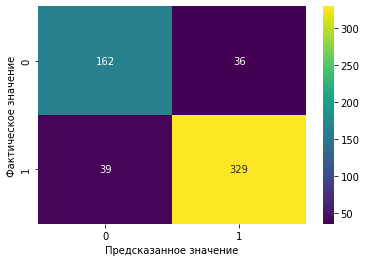

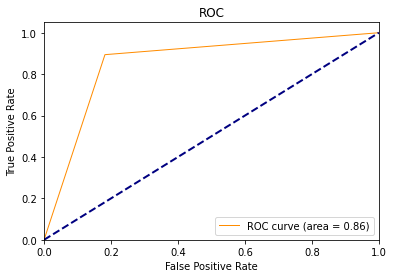

In [117]:
# логистическая регрессия
modelLRC2 = LogisticRegression(random_state=1, max_iter=200)
modelLRC2.fit(X_c2_train,np.ravel(y_c2_train))
performance_result(modelLRC2, X_c2_test, y_c2_test)
roc_auc_curve(modelLRC2, X_c2_test, y_c2_test)

Model accuracy is 0.8710247349823321
Model F-score 0.9001367989056089
Model Precision 0.8940217391304348
Model Recall 0.90633608815427
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       198
           1       0.91      0.89      0.90       368

    accuracy                           0.87       566
   macro avg       0.86      0.86      0.86       566
weighted avg       0.87      0.87      0.87       566

Model ROC AUC=0.861


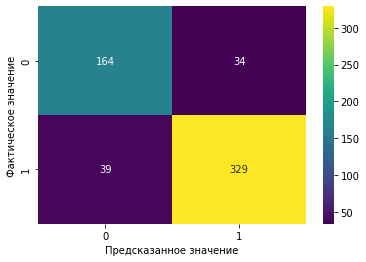

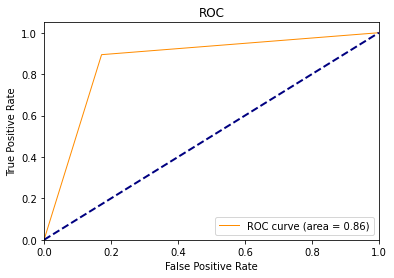

In [118]:
#гребневая регрессия
modelRCC2 = RidgeClassifier(random_state=1)
modelRCC2.fit(X_c2_train,np.ravel(y_c2_train))
performance_result(modelRCC2, X_c2_test, y_c2_test)
roc_auc_curve(modelRCC2, X_c2_test, y_c2_test)

Model accuracy is 0.8798586572438163
Model F-score 0.9081081081081082
Model Precision 0.9130434782608695
Model Recall 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       198
           1       0.90      0.91      0.91       368

    accuracy                           0.88       566
   macro avg       0.87      0.87      0.87       566
weighted avg       0.88      0.88      0.88       566

Model ROC AUC=0.866


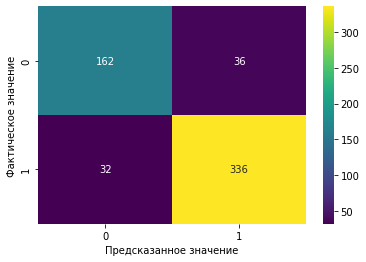

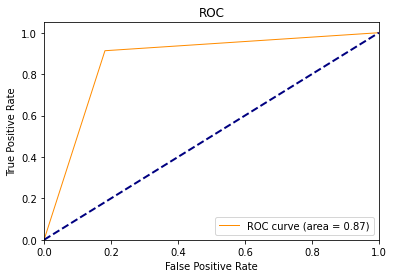

In [128]:
#случайный лес
modelRFCC2 = RandomForestClassifier(random_state=1)
param_grid_RFCC2 = {"max_depth": [3, 4, 5, None], 
                   "max_features": ['sqrt', 'log2'],
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"],
                   "n_estimators": [20,40,60,80,100] }
GS_RFCC2 = GridSearchCV(modelRFCC2, param_grid_RFCC2, cv=5)
GS_RFCC2.fit(X_c2_train,np.ravel(y_c2_train))
modelRFCC2 = GS_RFCC2.best_estimator_
modelRFCC2.fit(X_c2_train,np.ravel(y_c2_train))
performance_result(modelRFCC2, X_c2_test, y_c2_test)
roc_auc_curve(modelRFCC2, X_c2_test, y_c2_test)

Улучшения нет, на гребневой и логистической регрессии есть небольшие падения.

**Общие выводы:**
* Было предложено 3 варианта задачи бинарной классификации, основанных на следующем комментарии к датасету: «Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User"».
  1. Первая задача: предсказание того, что человек употреблял хотя бы одно вещество из списка (кроме алкоголя, шоколада, кофеина) за последние 10 лет. 
  2. Вторая задача: предсказание того, что человек употреблял хотя бы одно вещество из списка (кроме алкоголя, шоколада, кофеина, кофеина) за последние 10 лет. 
  3. Третья задача: предсказание того, что человек употреблял марихуану за последние 10 лет.
* В качестве валидирующих метрик были выбраны: accuracy, F-мера, ROC-AUC.
Для решения первой задачи значения категориальных признаков Alcohol, Caff, Choc были преобразованы в 0 и 1 согласно комментарию к датасету. Данные были смещени в сторону класса User. Были обучены следующие модели: логистическая регрессия, гребневая регрессия, метод K-ближайших соседей, случайный лес, наивный Байес. Лучшие результаты по набору из трех метрик продемонстрировала модель логистической регрессии.
* Для решения второй задачи категориальные фичи Alcohol, Caff, Choc, Nicotine (!) были преобразованы методом get_dummies() библиотеки pandas (аналогично sklearn-овскому OneHotEncoder). Были обучены следующие модели: логистическая регрессия, случайный лес, метод K-ближайших соседей и наивный байесовский классификатор. Лучшие результаты по трем метрикам снова продемонстрировала модель логистической регрессии. По всем моделям возросло значение метрики ROC-AUC.
* Для решения третьей задачи было выбрано одно вещество, которое стало целевым классом: Cannabis. Значения остальных категориальных признаков были преобразованы в 0 и 1. Были обучены следующие модели: логистическая регрессия, гребневая регрессия, метод K-ближайших соседей, случайный лес, наивный Байес. Лучшее качество по всем трем метрикам качества продемонстировала модель гребневой регрессии. Была произведена попытка улучшить результаты с помощью другого метода преобразования категориальных фич (pd.get_dummies()), но это не дало заметных улучшений.



# Multilabel Classification

Таргет: User/Non-User каждого из веществ

In [58]:
X_m = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 
            'Conscientiousness', 'Impulsiveness', 'SS', 'Alcohol', 'Caff', 'Choc','Nicotine']]
y_m =data[illegal_drugs]

In [59]:
X_m_train,X_m_test,y_m_train,y_m_test = train_test_split(X_m, y_m,test_size=0.3,shuffle=True,random_state=0)

## Случайный лес

In [60]:
modelRFCM = RandomForestClassifier()
param_grid_RFCM = {"max_depth": [3, 4, 5, None], 
                   "max_features": ['sqrt', 'log2'],
                   "bootstrap": [True, False],
                   "criterion": ["gini", "entropy"],
                   "n_estimators": [20,40,60,80,100] }
GS_RFCM = GridSearchCV(modelRFCM, param_grid_RFCM, cv=5)
GS_RFCM.fit(X_m_train,y_m_train)
modelRFCM = GS_RFCM.best_estimator_
predictionRFCM=modelRFCM.predict(X_m_test)


Random Forest Classifier Accuracy 0.24558303886925795


In [61]:
print('Micro Avg metrics:')
print('Random Forest Classifier Micro Avg Precision', metrics.precision_score(predictionRFCM,y_m_test, average='micro'))
print('Random Forest Classifier Micro Avg Precision', metrics.recall_score(predictionRFCM,y_m_test, average='micro'))
print('Random Forest Classifier Micro Avg F1-score', metrics.f1_score(predictionRFCM,y_m_test, average='micro'))

Micro Avg metrics:
Random Forest Classifier Micro Avg Precision 0.6448809973554968
Random Forest Classifier Micro Avg Precision 0.7184343434343434
Random Forest Classifier Micro Avg F1-score 0.6796735018913


In [62]:
print('Macro Avg Metrics:')
print('Random Forest Classifier Macro Avg Precision', metrics.precision_score(predictionRFCM,y_m_test, average='macro'))
print('Random Forest Classifier Macro Avg Precision', metrics.recall_score(predictionRFCM,y_m_test, average='macro'))
print('Random Forest Classifier Macro Avg F1-score', metrics.f1_score(predictionRFCM,y_m_test, average='macro'))

Macro Avg Metrics:
Random Forest Classifier Macro Avg Precision 0.46621465221946945
Random Forest Classifier Macro Avg Precision 0.56003886266745
Random Forest Classifier Macro Avg F1-score 0.49086399807460007


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Метод K-ближайших соседей

In [63]:
param_grid_KNNM = {"n_neighbors": list(range(1,11)) }
modelKNNM = KNeighborsClassifier()
GS_KNNM = GridSearchCV(modelKNNM, param_grid_KNNM, cv=5)
GS_KNNM.fit(X_m_train,y_m_train)
modelKNNM = GS_KNNM.best_estimator_
modelKNNM.fit(X_m_train,y_m_train)
predictionKNNM=modelKNNM.predict(X_m_test)

In [64]:
print('Micro Avg metrics:')
print('K-Nearest Neighbors Micro Avg Precision', metrics.precision_score(predictionKNNM,y_m_test, average='micro'))
print('K-Nearest Neighbors Micro Avg Precision', metrics.recall_score(predictionKNNM,y_m_test, average='micro'))
print('K-Nearest Neighbors Micro Avg F1-score', metrics.f1_score(predictionKNNM,y_m_test, average='micro'))

Micro Avg metrics:
K-Nearest Neighbors Micro Avg Precision 0.5848129958443521
K-Nearest Neighbors Micro Avg Precision 0.7277856135401974
K-Nearest Neighbors Micro Avg F1-score 0.6485127775450357


In [65]:
print('Macro Avg metrics:')
print('K-Nearest Neighbors Macro Avg Precision', metrics.precision_score(predictionKNNM,y_m_test, average='macro'))
print('K-Nearest Neighbors Macro Avg Precision', metrics.recall_score(predictionKNNM,y_m_test, average='macro'))
print('K-Nearest Neighbors Macro Avg F1-score', metrics.f1_score(predictionKNNM,y_m_test, average='macro'))

Macro Avg metrics:
K-Nearest Neighbors Macro Avg Precision 0.4072559340672593
K-Nearest Neighbors Macro Avg Precision 0.5662327731789432
K-Nearest Neighbors Macro Avg F1-score 0.4432535359965809


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Гребневая регрессия

In [66]:
modelRCM = RidgeClassifier(random_state=1)
modelRCM.fit(X_m_train,y_m_train)
predictionRCM=modelRCM.predict(X_m_test)

In [67]:
print('Micro Avg metrics:')
print('Ridge Classifier Micro Avg Precision', metrics.precision_score(predictionRCM,y_m_test, average='micro'))
print('Ridge Classifier Micro Avg Precision', metrics.recall_score(predictionRCM,y_m_test, average='micro'))
print('Ridge Classifier Micro Avg F1-score', metrics.f1_score(predictionRCM,y_m_test, average='micro'))

Micro Avg metrics:
Ridge Classifier Micro Avg Precision 0.6278806195693237
Ridge Classifier Micro Avg Precision 0.7479747974797479
Ridge Classifier Micro Avg F1-score 0.6826863832409118


In [68]:
print('Macro Avg metrics:')
print('Ridge Classifier Macro Avg Precision', metrics.precision_score(predictionRCM,y_m_test, average='macro'))
print('Ridge Classifier Macro Avg Precision', metrics.recall_score(predictionRCM,y_m_test, average='macro'))
print('Ridge Classifier Macro Avg F1-score', metrics.f1_score(predictionRCM,y_m_test, average='macro'))

Macro Avg metrics:
Ridge Classifier Macro Avg Precision 0.42464801546745257
Ridge Classifier Macro Avg Precision 0.4606447171861108
Ridge Classifier Macro Avg F1-score 0.43149559625266715


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [2]:
import numpy as np

# Сгенерируем данные для задачи
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [3]:
# <YOUR_CODE_HERE>
# Для сравнения средних используем t-критерий Стьюдента, пусть уровень значимости 0.05

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(control, test)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -2.556719140661
P-Value:  0.01056718087175811


Мы выбрали уровень значимости 0.05, p-value оказалось меньше 0.05, отвергаем гипотезу о равенстве средних этих двух выборок, разница средних оказалась статистически значимой.

### **Задание №4 (*)**. В прошлом задании мы улавливали статистически значимое различие в средних в 0.04 единицы на выборке из 100000 клиентов. Насколько больше нам требуется собрать клиентов, чтобы уловить различие в 0.02?

In [ ]:
# <YOUR_CODE_HERE>